# ADS Homework 3

## 1: Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


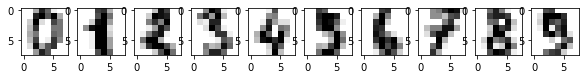

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [5]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
## code here
scalerX = preprocessing.StandardScaler().fit(X)
XS=scalerX.transform(X) 

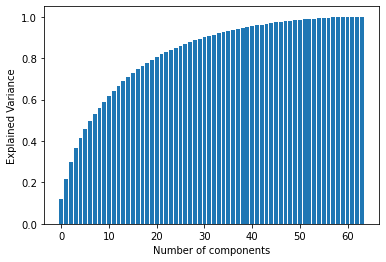

In [6]:
#Plot explained variance per number of leading PC's 
pca = PCA(XS.shape[1])
XP=pca.fit_transform(XS)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of components
n=XS.shape[1]
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [7]:
#describe in a few words what you can infer from the above plot


#About 7 components explain 50% of the data, and about 20 components explain 80% of the data

### Task 2: Now use three leading PCs to visualize the digits (different colors for different digits)

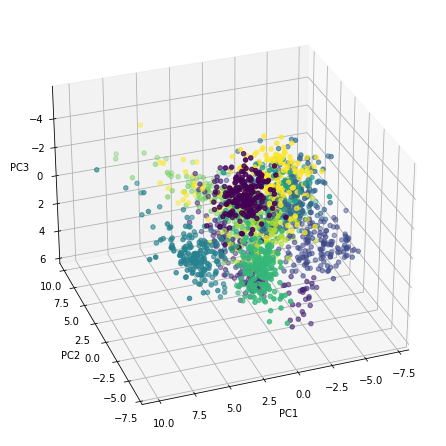

In [8]:
# use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
cmap=plt.cm.get_cmap('Spectral')(np.linspace(0, 1, 10))

## code here
pca = PCA(3)
XP = pca.fit_transform(XS)
ax.scatter(XP[:,0],XP[:,1],XP[:,2],c=data.y)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


### Task 3: Find six examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of  first two PCs (3 examples each)

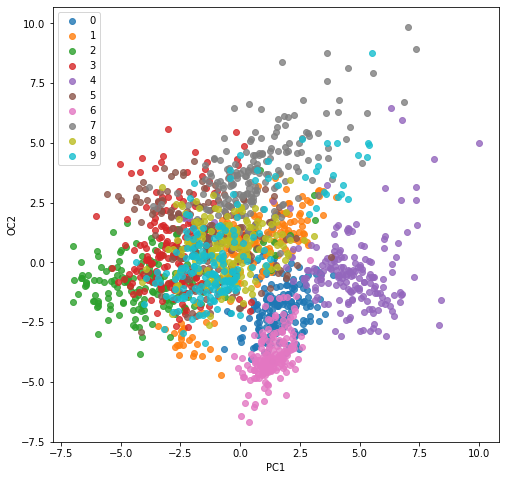

In [9]:
## code here
pca = PCA(2)


plt.figure(figsize=(8,8))
for i in range(0,10):
    plt.scatter(XP[y==i, 0], XP[y==i, 1], alpha=0.8, label=i)
plt.xlabel("PC1") 
plt.ylabel("OC2")
plt.legend()

Pairs distinguished: 0 and 2, 6 and 7, 3 and 4.

Pairs can not be clearly distinguished: 8 and 9, 0 and 6, 3 and 5.

## 2. PCA for feature engineering

Another common application of PCA is overcomming multicollinearity and overfitting in regression models. Here we'll use PCA for reducing dimensionality of a data set and improving the accuracy in the regression task.

In [10]:
#read data
data=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/pca_synthetic.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


### Task 1: Run a linear regression with 'Y' as the target and x1-x15 as regressors and report out of sample R2 score

Split the data into training and test (choose 70:30 split) and report out of sample score with test data. Also comment on the significance of the regressors (based on p-values)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [12]:
## code here

data_2=data.iloc[:,1:]
Y=data.Y
lm=sm.OLS(Y,sm.add_constant(data_2)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     12.33
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.20e-09
Time:                        10:27:25   Log-Likelihood:                -53.727
No. Observations:                  50   AIC:                             139.5
Df Residuals:                      34   BIC:                             170.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2459      2.386     -4.295      0.0

In [13]:
## report mean out-of-sample R2 score

np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data_2.iloc[:,:]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()  
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

OS R-squared is 0.529+-0.218


### Task 2: Try PCA - use a few leading principal components as regressors and see if they will perform better in the regression

You can choose the number of PCs by either checking explained variance or by trying out different numbers and choosing one that works best.

Split the data into training and test and report mean test accuracy

In [14]:
## run PCA
## code here

scaler_data = preprocessing.StandardScaler().fit(data)
dataS=scaler_data.transform(data)

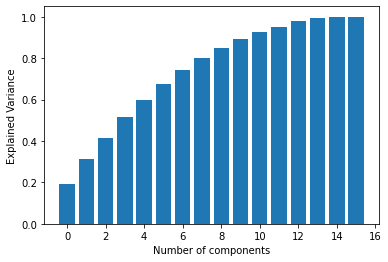

In [15]:
## plot explained variance barplot and comment on the appropriate number of eigenvectors based on that
pca = PCA(dataS.shape[1])
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=16
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

About 3 components explain 50% of the data, and about 7 components explain 80% of the data

In [16]:
## choose leading number of PCs as regressors and run linear regression again
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data_2.iloc[:,:4]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
  
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())

print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

OS R-squared is 0.377+-0.283


In [17]:
## choose leading number of PCs as regressors and run linear regression again
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data_2.iloc[:,:8]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))



In [18]:
## report out of sample mean R2 score

print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))


OS R-squared is 0.574+-0.194


out of sample mean R2 score improves from 0.529+-0.218 to 0.574+-0.194

## 3: Modeling mean income with 311 complaint patterns

We'll use 311 complaints data set to model the mean income of zip codes in NYC. We will aslo check if using PCA in this case improves the performance as compared to just the linear model.

In [19]:
#load the income data
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


In [20]:
## 311 data
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2022ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [21]:
#merge income data with 311
DataIncome1=dataIncome.merge(data311,left_index=True,right_index=True)

In [22]:
DataIncome1.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10001.0,71244.6100,123112.7764,17678,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,30843.9574,46258.6118,70878,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,89998.5339,139330.9968,53609,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,110183.6857,156682.7615,1271,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0
10005.0,115133.2855,163762.6601,1517,0.000000,0.000000,0.008219,0.0,0.000000,0.002192,0.000548,...,0.000000,0.000000,0.000000,0.013699,0.000000,0.000548,0.000000,0.019726,0.0,0.0


### Task 1: Using 'Mean' as target variable, and 311 complaints as regressors, run a linear regression model and report out of sample (test) accuracy after cross validation

In [23]:
## code here
data=DataIncome1.iloc[:,3:]
Y=DataIncome1.Mean
lm=sm.OLS(Y,sm.add_constant(data)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     23.81
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.11e-07
Time:                        10:27:27   Log-Likelihood:                -1611.6
No. Observations:                 175   AIC:                             3547.
Df Residuals:                      13   BIC:                             4060.
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [24]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,:]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())

print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))


OS R-squared is -6.554+-12.021


In [25]:
data.shape

(175, 162)

### Task 2: Now analyze performance using PCA depending on the number N of leading PCs to take.

In [26]:
# apply PCA first for whole data
scaler_data = preprocessing.StandardScaler().fit(data)
dataS=scaler_data.transform(data)
pca = PCA(dataS.shape[1])
dataP=pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

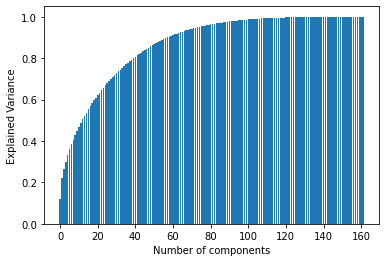

In [27]:
## plot explained variance and chose N leading PCs (choose N either by explained variance or try different values and choose best one)
n=162
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

About 17 components explain 50% of the data, and about 40 components explain 80% of the data

In [28]:

np.random.seed(2018)
R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
for j in range(2,43):
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,:]),Y,test_size=0.3)
        scaler = preprocessing.StandardScaler().fit(X_train) 
        pca = PCA(j)
        X_trainP=pca.fit_transform(scaler.transform(X_train))
        res=sm.OLS(y_train,sm.add_constant(X_trainP)).fit()
        X_testP=pca.transform(scaler.transform(X_test))
        y_pred=np.asarray(res.predict(sm.add_constant(X_testP)))
        R_OS.append(r2_score(y_test,y_pred))
    print("OS R-squared of {0}PC is {1:.3f}+-{2:.3f}".format(j,np.mean(R_OS),np.std(R_OS)))


OS R-squared of 2PC is 0.544+-0.113
OS R-squared of 3PC is 0.546+-0.116
OS R-squared of 4PC is 0.530+-0.139
OS R-squared of 5PC is 0.537+-0.139
OS R-squared of 6PC is 0.528+-0.147
OS R-squared of 7PC is 0.520+-0.158
OS R-squared of 8PC is 0.515+-0.165
OS R-squared of 9PC is 0.508+-0.174
OS R-squared of 10PC is 0.495+-0.199
OS R-squared of 11PC is 0.486+-0.217
OS R-squared of 12PC is 0.477+-0.226
OS R-squared of 13PC is 0.458+-0.277
OS R-squared of 14PC is 0.446+-0.309
OS R-squared of 15PC is 0.437+-0.319
OS R-squared of 16PC is 0.430+-0.337
OS R-squared of 17PC is 0.414+-0.401
OS R-squared of 18PC is 0.400+-0.439
OS R-squared of 19PC is 0.385+-0.479
OS R-squared of 20PC is 0.377+-0.491
OS R-squared of 21PC is 0.375+-0.489
OS R-squared of 22PC is 0.363+-0.630
OS R-squared of 23PC is 0.351+-0.641
OS R-squared of 24PC is 0.334+-0.677
OS R-squared of 25PC is 0.320+-0.746
OS R-squared of 26PC is 0.308+-0.753
OS R-squared of 27PC is 0.302+-0.777
OS R-squared of 28PC is 0.297+-0.780
OS R-squa

### Task 3: Try implementing Lasso regression (feature selection) over all the PCs.

Use alpha=10000 as the regularization parameter. Report out of sample mean R2 score by splitting data into train and test

In [29]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
# dataframe = read_csv(url, header=None)
# data = dataframe.values
# X, y = data[:, :-1], data[:, -1]
# # define model
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,:]),Y,test_size=0.3)
    model = Lasso(alpha=10000)

    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    # evaluate model
#     scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    R_OS.append(r2_score(y_test,y_pred))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

OS R-squared is -0.025+-0.044


### Task 4: Implement cross-validation for Lasso PCA regression above with further splitting the training sample into training and validation and tuning the parameter over the validation sample

In [30]:
## code here
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':np.logspace(-3,5,num=1000)}
X_train1, X_vali, y_train1, y_vali = train_test_split(X_train,y_train,test_size=0.3,random_state=1000)
scaler = preprocessing.StandardScaler().fit(X_train1)
pca = PCA(3) 
X_train1P=pca.fit_transform(scaler.transform(X_train1))
Lasso=Lasso(fit_intercept=True)
gr=GridSearchCV(Lasso,param_grid=param_grid,n_jobs=-1,cv=3,refit=True)
rs=gr.fit(X_train1P,y_train1)
print("The best alpha is {0}".format(rs.best_params_)) 
X_valiP=pca.transform(scaler.transform(X_vali))
y_pred=rs.predict(X_valiP)
print("The OS R-squared of Lasso is: {0:.3f}".format(r2_score(y_vali,y_pred)))

The best alpha is {'alpha': 15530.705739334584}
The OS R-squared of Lasso is: 0.698
